# Procesando DataSet de Diabetes

In [1]:
# Paquetes numéricos
import numpy as np

# DataFrames/Procesamiento
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt

In [2]:
# Leer y cargar el CSV
data = pd.read_csv("diabetes.csv")

# Ver qué hay en el DataFrame
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Identificar el tipo de dato
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

---

# Pregunta 1
Tienes un conjunto de datos de información de ventas sobre equipos electrónicos.
Una de las columnas del conjunto de datos describe qué es el producto: 
tableta, teléfono inteligente, TV, computadora. 
## ¿Qué tipo de datos es este?

Es un dato categórico, el cuál puede ser representado como entero (int64)
donde cada número equivale a u producto
(0:Tableta,  1:Teléfono,  2:TV,  3:Computadora)

---

# Pregunta 2
A partir del mismo conjunto de datos de equipos electrónicos anterior, tienes información sobre el precio de cada artículo.
## ¿Qué tipo de datos es este?
Es un dato numérico flotante (float64), porque puede haber un productor cuyo valor es por ejemplo $168.95

---

# Pregunta 3
Tienes información sobre el kilometraje (distancia recorrida) de varios automóviles en un concesionario.
## ¿Qué tipo de información es esta?
Es un valor numérico entero (int64), porque los vehículos miden en valores enteros de Km, por ejemplo un vehículo puede tener 24 332km, pero no es común que sea 24 332.5Km

---

In [6]:
# Verificando valores vacíos
print("Número original de datapoints\n", data.shape) # Filas x Columnas

# Elimina cualquier valor faltante y remplazarlos hacia la variable de los datos
data = data.dropna()

# Comprueba la nueva forma (shape)
print("Número actualizado de datapoints\n", data.shape) # Filas x Columnas

Número original de datapoints
 (768, 9)
Número actualizado de datapoints
 (768, 9)


## Histogramas

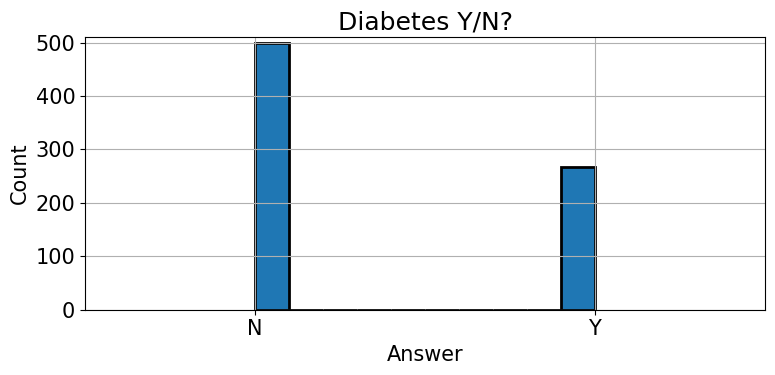

In [13]:
# Ajustar el tamaño de fuente.
plt.rcParams['font.size'] = 15 

# Crear una figura y ajusta su tamaño.
f = plt.figure(figsize=(8,4))

# Crear un subplot o subtrama - al ser una sola figura es 1,1,1.
ax = f.add_subplot(1,1,1)

# Gráfica tus datos usando 'hist'. Pasa el objeto 'ax' a Pandas. Agrega un borde negro con un groso de 2.
data["Outcome"].hist(ax=ax, edgecolor='black', linewidth=2)

# Establece los límites en el eje x.
ax.set_xlim([-0.5, 1.5])

# Establece la frecuencia de tick. Tenemos 0 y 1 que corresponden a Sí y No respectivamente.
ax.set_xticks([0, 1])

# Etiquetar xtick labels.
ax.set_xticklabels(["N", "Y"])

# Crea el título.
ax.set_title("Diabetes Y/N?")

# Establece la etiqueta del eje X.
ax.set_xlabel("Answer")

# Establece la etiqueta del eje Y.
ax.set_ylabel("Count")

# Establece los límites superior/inferior del eje y.
ax.set_ylim([0, 510])

# Hace que las cosas sean bonitas, no es necesario, pero se ajusta al tamaño de la figura.
f.tight_layout()

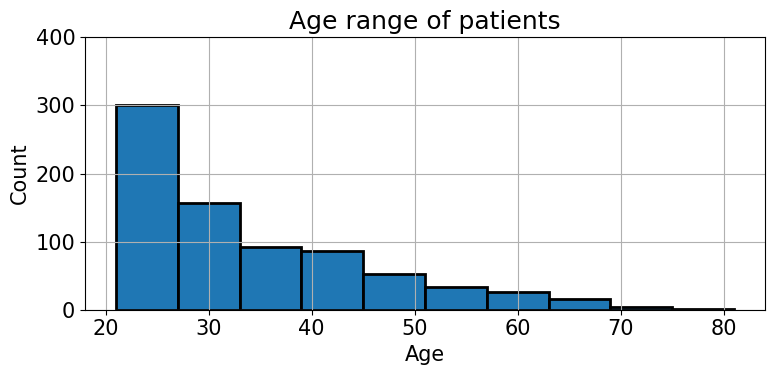

In [15]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
data["Age"].hist(ax=ax, edgecolor='black', linewidth=2)
ax.set_title("Age range of patients")
ax.set_ylim([0, 510])
ax.set_xlabel("Age")
ax.set_ylabel("Count")
f.tight_layout()

# Reto 1

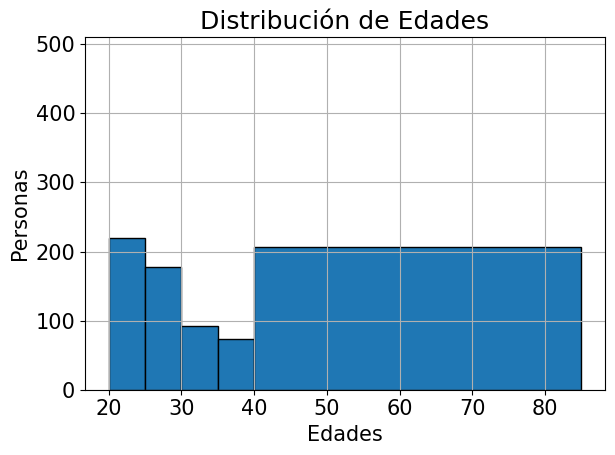

In [33]:
# Crear el histograma
binvalues = [20, 25, 30, 35, 40, 85]
bins = binvalues
plt.hist(data['Age'], bins=bins, edgecolor='black')

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Personas')
plt.ylim([0, 510])
plt.grid()
plt.tight_layout()

# Mostrar el histograma
plt.show()

# Reto 2

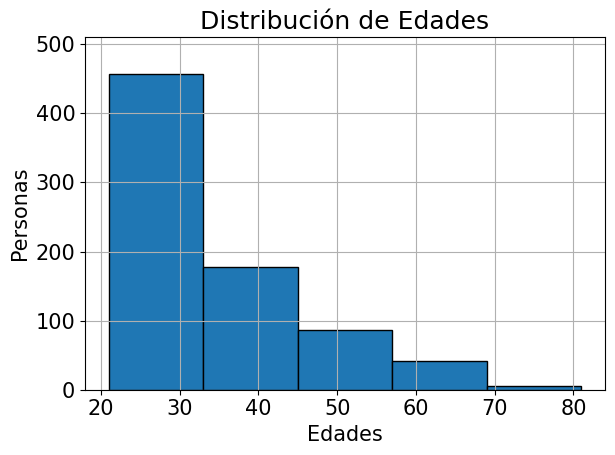

In [34]:
# Crear el histograma
plt.hist(data['Age'], bins=5, edgecolor='black')

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Personas')
plt.ylim([0, 510])
plt.grid()
plt.tight_layout()

# Mostrar el histograma
plt.show()

# Gráfico de dispersión

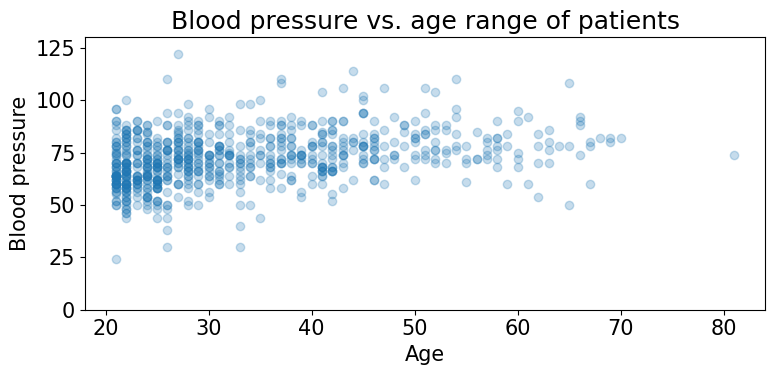

In [40]:
plt.rcParams['font.size'] = 15 
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(data["Age"], data["BloodPressure"], alpha=0.25)
ax.set_title("Blood pressure vs. age range of patients")
ax.set_ylabel("Blood pressure")
ax.set_xlabel("Age")
ax.set_ylim([0, 130])
f.tight_layout() 

In [36]:
# Removemos los datos con presión igual a 0. (Limpieza de data)
# Seleccionar las filas donde el valor es mayor a 0.
data = data[data["BloodPressure"] > 0]
print("Patients with blood pressure\n", data.shape) # Rows x Columns

Patients with blood pressure
 (733, 9)


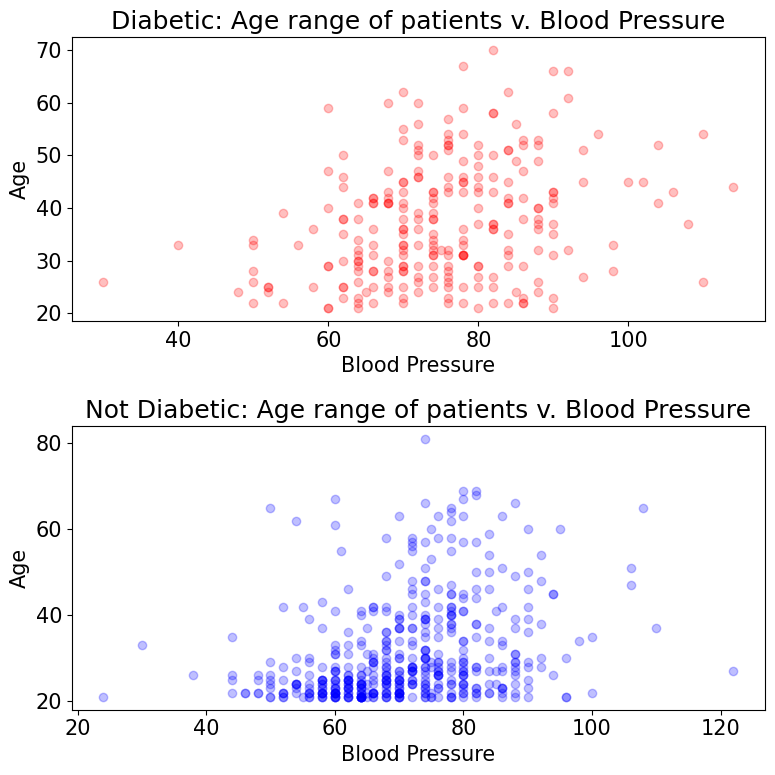

In [42]:
diabetic = data[data["Outcome"] == 1]
notdiabetic = data[data["Outcome"] == 0]

plt.rcParams['font.size'] = 15 
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2,1,1)
ax.scatter(diabetic["BloodPressure"], diabetic["Age"], alpha=0.25, c='r')
ax.set_title("Diabetic: Age range of patients v. Blood Pressure")
ax.set_ylabel("Age")
ax.set_xlabel("Blood Pressure")

bx = f.add_subplot(2,1,2)
bx.scatter(notdiabetic["BloodPressure"], notdiabetic["Age"], alpha=0.25, c='b')
bx.set_title("Not Diabetic: Age range of patients v. Blood Pressure")
bx.set_ylabel("Age")
bx.set_xlabel("Blood Pressure")

f.tight_layout() 

---

# Preguntas de reto

# Pregunta 1

Tienes un conjunto de datos de una empresa de ropa y deseas predecir el volumen de ventas de vestidos en el próximo mes.


## ¿Qué tipo de problema es?
Es un problema de aprendizaje supervisado, específicamente regresión, porque el outcome es un valor numérico (volumen de ventas)

# Pregunta 2

Al igual que en la primera pregunta, estás utilizando un conjunto de datos de ropa. En lugar de predecir el volumen de ventas, querrás saber si venderás al menos 1000 de un determinado tipo de vestido.

## ¿Qué tipo de problema es este?
Es un problema de aprendizaje supervisado, en este caso es clasificación, porque el outcome es saber si se vende menos de 1000 vestidos o no.

# Pregunta 3

Tienes información sobre cómo compran ropa los clientes en tu tienda. Tienes un conjunto de datos de sus compras, segmentado en categorías: la cantidad de pantalones, camisas, vestidos y faldas que compra cada cliente. Deseas segmentar a tus clientes en diferentes grupos para poder enviar anuncios a cada grupo, según lo que quieran usar.

## ¿Qué tipo de problema podría ser este?
Es un problema de aprendizaje no supervisado, clustering, el cual permitiría segmentar a mi clientela en base a la información que tengo para poder brindar publicidad segmentada por usuario.